In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import datetime
import warnings
warnings.filterwarnings('ignore')

In [80]:
from sklearn.metrics import plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/Anis/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [4]:
ip_df = pd.read_csv('IpAddress_to_Country.csv')
fraud_df = pd.read_csv('Fraud_Data.csv')

In [5]:
ip_df.shape

(138846, 3)

In [6]:
ip_df.isna().any()

lower_bound_ip_address    False
upper_bound_ip_address    False
country                   False
dtype: bool

In [7]:
fraud_df.shape

(151112, 11)

In [8]:
fraud_df.isna().any()

user_id           False
signup_time       False
purchase_time     False
purchase_value    False
device_id         False
source            False
browser           False
sex               False
age               False
ip_address        False
class             False
dtype: bool

In [9]:
ip_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [10]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [11]:
fraud_df.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [12]:
type(fraud_df["ip_address"])

pandas.core.series.Series

In [13]:
fraud_df_full = fraud_df.copy()

In [14]:
countries = [] 
for i in range(len(fraud_df.ip_address)):
    ip = fraud_df.ip_address[i]
    tmp = ip_df[(ip_df['lower_bound_ip_address']<=ip) & (ip_df['upper_bound_ip_address']>=ip)]['country'].tolist()
    countries.extend(tmp if tmp else ['NaN'])
    
fraud_df_full["country"] = countries

In [15]:
fraud_df_full.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


### Descriptive Statistics 

In [16]:
fraud_df_full["class"].describe()

count    151112.000000
mean          0.093646
std           0.291336
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: class, dtype: float64

Un taux de fraude de 9%

### Country

In [75]:
fraud_df_full["country"].value_counts(1)

United States                    0.384146
NaN                              0.145362
China                            0.079663
Japan                            0.048348
United Kingdom                   0.029713
                                   ...   
Madagascar                       0.000007
Bonaire; Sint Eustatius; Saba    0.000007
Nauru                            0.000007
Turkmenistan                     0.000007
Cape Verde                       0.000007
Name: country, Length: 182, dtype: float64

In [18]:
fraud_df_full[fraud_df_full["class"]==1]["country"].value_counts(1)

United States            0.392269
NaN                      0.133065
China                    0.073705
Japan                    0.050526
United Kingdom           0.033708
                           ...   
Virgin Islands (U.S.)    0.000071
Montenegro               0.000071
Guatemala                0.000071
Macedonia                0.000071
Mauritius                0.000071
Name: country, Length: 110, dtype: float64

### Browser

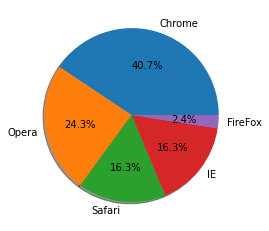

In [19]:
plt.pie(fraud_df_full["browser"].value_counts(),labels=fraud_df_full["browser"].unique(),
        autopct='%1.1f%%',shadow=True);

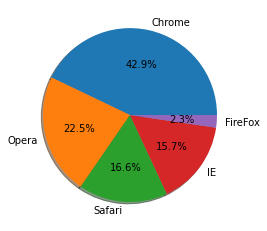

In [20]:
plt.pie(fraud_df_full[fraud_df_full["class"]==1]["browser"].value_counts(),labels=fraud_df_full["browser"].unique(),
        autopct='%1.1f%%',shadow=True);

### Source

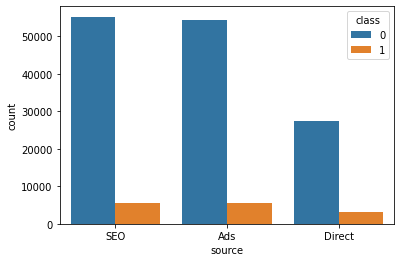

In [21]:
sns.countplot(x="source", data=fraud_df_full, hue="class");

### Sex

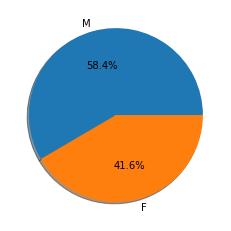

In [22]:
plt.pie(fraud_df_full["sex"].value_counts(),labels=fraud_df_full["sex"].unique(),
        autopct='%1.1f%%',shadow=True);

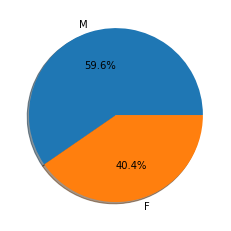

In [23]:
plt.pie(fraud_df_full[fraud_df_full["class"]==1]["sex"].value_counts(),labels=fraud_df_full["sex"].unique(),
        autopct='%1.1f%%',shadow=True);

### Purchase Value

In [24]:
fraud_df_full.purchase_value.describe()

count    151112.000000
mean         36.935372
std          18.322762
min           9.000000
25%          22.000000
50%          35.000000
75%          49.000000
max         154.000000
Name: purchase_value, dtype: float64

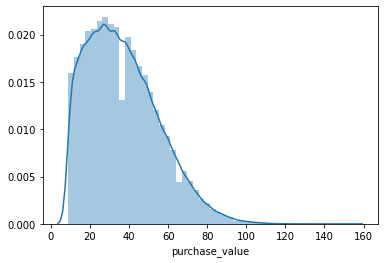

In [25]:
sns.distplot(fraud_df_full.purchase_value);

In [26]:
(fraud_df_full[fraud_df_full["class"]==1]["purchase_value"]).describe()

count    14151.000000
mean        36.993004
std         18.397654
min          9.000000
25%         22.000000
50%         35.000000
75%         49.000000
max        111.000000
Name: purchase_value, dtype: float64

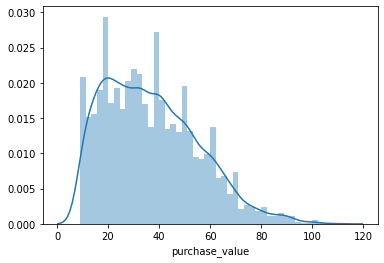

In [27]:
sns.distplot(fraud_df_full[fraud_df_full["class"]==1]["purchase_value"]);

### Age

In [28]:
fraud_df_full.age.describe()

count    151112.000000
mean         33.140704
std           8.617733
min          18.000000
25%          27.000000
50%          33.000000
75%          39.000000
max          76.000000
Name: age, dtype: float64

In [29]:
(fraud_df_full[fraud_df_full["class"]==1]["age"]).describe()

count    14151.000000
mean        33.318281
std          8.568001
min         18.000000
25%         27.000000
50%         33.000000
75%         39.000000
max         68.000000
Name: age, dtype: float64

### Feature engineering

In [30]:
signup = pd.to_datetime(fraud_df_full["signup_time"])
purchase = pd.to_datetime(fraud_df_full["purchase_time"])

In [31]:
time = purchase - signup

In [32]:
type(time)

pandas.core.series.Series

In [33]:
fraud_df_full["time"] = time / datetime.timedelta(days=1)

In [34]:
fraud_df_full.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,52.160671
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,0.207685
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0.000012
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,5.695428
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,50.479873


In [35]:
fraud_clean = fraud_df_full.drop(["user_id","signup_time","purchase_time","device_id","ip_address","country"],axis=1)

In [36]:
fraud_clean.head()

,purchase_value,source,browser,sex,age,class,time
0,34,SEO,Chrome,M,39,0,52.160671
1,16,Ads,Chrome,F,53,0,0.207685
2,15,SEO,Opera,M,53,1,0.000012
3,44,SEO,Safari,M,41,0,5.695428
4,39,Ads,Safari,M,45,0,50.479873


In [37]:
X = fraud_clean.drop(["class"],axis=1)
y = fraud_clean.loc[:,"class"]

In [38]:
X_dummies = pd.get_dummies(X,drop_first=True)

## Decision Tree

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummies,y,test_size=0.3,random_state=0)

In [40]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=0)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [41]:
print("training set score : ", clf_tree.score(X_train, y_train))
print("test     set score : ", clf_tree.score(X_test, y_test))

training set score :  1.0
test     set score :  0.9100895575065072


In [42]:
y_pred = clf_tree.predict(X_test)

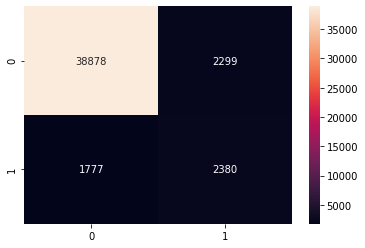

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d");

In [44]:
print("positive predictive value (precision):", cm[1,1]/(cm[1,1]+cm[0,1]))
print("negative predictive value            :", cm[0,0]/(cm[0,0]+cm[1,0]))

positive predictive value (precision): 0.5086556956614662
negative predictive value            : 0.9562907391464764


In [45]:
feature_importance = pd.DataFrame({"features": X_dummies.columns[:], "score": clf_tree.feature_importances_}).sort_values(by="score", ascending=False)
feature_importance

,features,score
2,time,0.778469
0,purchase_value,0.091423
1,age,0.062507
9,sex_M,0.018470
6,browser_IE,0.013351
5,browser_FireFox,0.011415
4,source_SEO,0.011349
8,browser_Safari,0.010032
7,browser_Opera,0.002762
3,source_Direct,0.000223


## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50,random_state=0)
rf_classifier.fit(X_train, y_train)
print("training set score : ", rf_classifier.score(X_train, y_train))
print("test     set score : ", rf_classifier.score(X_test, y_test))

training set score :  0.9988655486017887
test     set score :  0.9572506286672254


In [47]:
y_pred_forest = rf_classifier.predict(X_test)

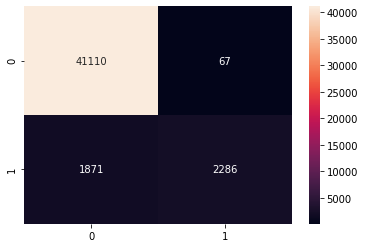

In [48]:
cm_forest = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cm_forest, annot=True, fmt="d");

In [49]:
print("positive predictive value (precision):", cm_forest[1,1]/(cm_forest[1,1]+cm_forest[0,1]))
print("negative predictive value            :", cm_forest[0,0]/(cm_forest[0,0]+cm_forest[1,0]))

positive predictive value (precision): 0.9715257118572036
negative predictive value            : 0.9564691375258836


In [50]:
feature_importance_forest = pd.DataFrame({"features": X_dummies.columns[:], "score": rf_classifier.feature_importances_}).sort_values(by="score", ascending=False)
feature_importance_forest

,features,score
2,time,0.769946
0,purchase_value,0.121527
1,age,0.088653
9,sex_M,0.004978
4,source_SEO,0.003287
8,browser_Safari,0.003240
5,browser_FireFox,0.002828
6,browser_IE,0.002652
7,browser_Opera,0.001492
3,source_Direct,0.001396


### LDA

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [52]:
X_lda = lda.fit(X_dummies,y).transform(X_dummies)

In [53]:
lda.explained_variance_ratio_

array([1.])

In [54]:
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda,y,random_state=0)

In [55]:
clf_tree_lda = DecisionTreeClassifier(max_depth=3)
clf_tree_lda.fit(X_train_lda,y_train_lda)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
print("training set score : ", clf_tree_lda.score(X_train_lda, y_train_lda))
print("test     set score : ", clf_tree_lda.score(X_test_lda, y_test_lda))

training set score :  0.9247357368486068
test     set score :  0.927100428821007


In [57]:
y_pred_lda = clf_tree_lda.predict(X_test_lda)

In [58]:
cm_lda = confusion_matrix(y_test_lda,y_pred_lda)

In [59]:
print("positive predictive value (precision):", cm_lda[1,1]/(cm_lda[1,1]+cm_lda[0,1]))
print("negative predictive value            :", cm_lda[0,0]/(cm_lda[0,0]+cm_lda[1,0]))

positive predictive value (precision): 0.6668173598553345
negative predictive value            : 0.9432885339931395


## AdaBoost

In [60]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=0)
ada.fit(X_train, y_train)
print("training set score : ", ada.score(X_train, y_train))
print("test     set score : ", ada.score(X_test, y_test))

training set score :  0.955813118039668
test     set score :  0.9585961971147483


In [61]:
y_pred_ada = ada.predict(X_test)

In [79]:
from sklearn.metrics import plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/Anis/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

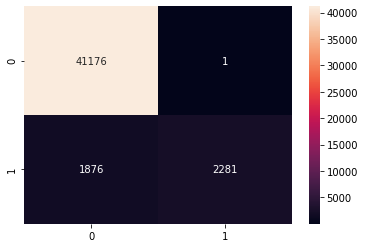

In [78]:
cm_ada = confusion_matrix(y_test,y_pred_ada)
sns.heatmap(cm_ada, annot=True, fmt="d");

In [63]:
print("positive predictive value (precision):", cm_ada[1,1]/(cm_ada[1,1]+cm_ada[0,1]))
print("negative predictive value            :", cm_ada[0,0]/(cm_ada[0,0]+cm_ada[1,0]))

positive predictive value (precision): 0.9995617879053462
negative predictive value            : 0.9564247886277061


In [64]:
feature_importance_ada = pd.DataFrame({"features": X_dummies.columns[:], "score": ada.feature_importances_}).sort_values(by="score", ascending=False)
feature_importance_ada

,features,score
2,time,0.66
0,purchase_value,0.16
1,age,0.14
3,source_Direct,0.02
6,browser_IE,0.02
4,source_SEO,0.00
5,browser_FireFox,0.00
7,browser_Opera,0.00
8,browser_Safari,0.00
9,sex_M,0.00


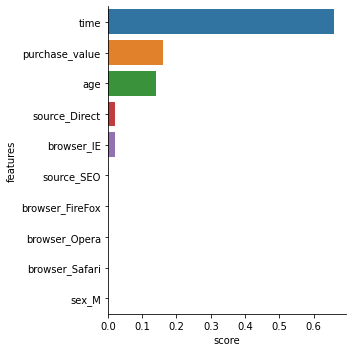

In [65]:
sns.catplot(x="score",y="features", data=feature_importance_ada, kind="bar" )

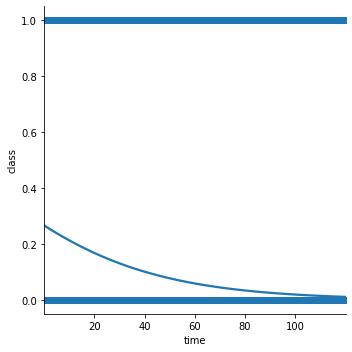

In [66]:
sns.lmplot("time","class",data=fraud_clean,logistic=True)

In [67]:
fraud_time = fraud_df_full.copy()

In [68]:
fraud_time["time_hours"] = time / datetime.timedelta(hours=1)

In [69]:
fraud_time[fraud_time["time_hours"] < 24]["class"].describe()

count    8758.000000
mean        0.873259
std         0.332702
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: class, dtype: float64

Le taux de fraude est de 9%. Plus on baisse le temps d'achat, plus le taux de fraude augmente.
Sur les 8758 achats effectués en moins d'une journée, 87% étaient une fraude. 

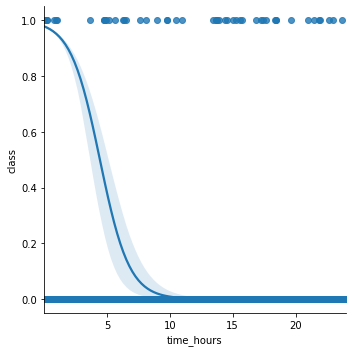

In [70]:
sns.lmplot("time_hours","class",data=fraud_time[fraud_time["time_hours"] < 24],logistic=True);

Les utilisateurs qui peuvent être classés comme risqués sont ceux qui font des achats rapides sur la plateforme.
Donc par mesure de précaution, tout achat effectué rapidement sur le site devrait être vérifié par des mesures d'authentification supplémentaires. 